# Preliminary analysis:

a.Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.


In [70]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [71]:
# Reading the dataset
data = pd.read_excel("cep1_dataset.xlsx")

In [72]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [73]:
data.shape

(303, 14)

b. remove duplicates (if any) and treat missing values using an appropriate strategy

In [74]:
# Chekcing for null values
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [75]:
data.duplicated().sum()

1

In [76]:
data.drop_duplicates(inplace=True)      # Dropping duplicate records

In [77]:
data.duplicated().sum()

0

In [78]:
data.shape

(302, 14)

preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data

In [79]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 

In [81]:
# Renaming columns so that it will be easier to analyze

data.rename({'cp' :'chest_pain_type',
             'trestbps':'resting_blood_pressure', 
             'chol':'cholesterol', 
             'fbs' :'fasting_blood_sugar', 
             'restecg':'resting_ecg',
             'thalach' : 'max_heart_rate',
             'exang':'exercise_induced_angina',
             'oldpeak':'st_depression',
             'slope':'st_slope',
             'ca' : 'major_vessels', 
             'thal' :'thalessimia' },axis = 1,inplace=True)

In [82]:
data

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels,thalessimia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [83]:
categorical = ['sex','chest_pain_type','fasting_blood_sugar','exercise_induced_angina','st_slope','thalessimia']

In [84]:
data.loc[ : , data.columns.isin(categorical)]

,sex,chest_pain_type,fasting_blood_sugar,exercise_induced_angina,st_slope,thalessimia
0,1,3,1,0,0,1
1,1,2,0,0,0,2
2,0,1,0,0,2,2
3,1,1,0,0,2,2
4,0,0,0,1,2,2
...,...,...,...,...,...,...
298,0,0,0,1,1,3
299,1,3,0,0,1,3
300,1,0,1,0,1,3
301,1,0,0,1,1,3


In [85]:
data.loc[ : , data.columns.isin(categorical)].describe()

,sex,chest_pain_type,fasting_blood_sugar,exercise_induced_angina,st_slope,thalessimia
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,0.682119,0.963576,0.149007,0.327815,1.397351,2.314570
std,0.466426,1.032044,0.356686,0.470196,0.616274,0.613026
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000
75%,1.000000,2.000000,0.000000,1.000000,2.000000,3.000000
max,1.000000,3.000000,1.000000,1.000000,2.000000,3.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


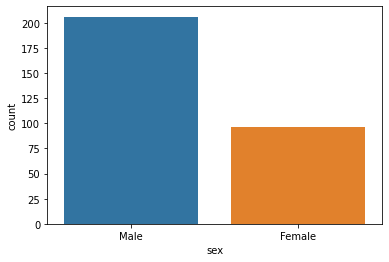

In [86]:
# Replacing the values of sex column with their respective names

data["sex"]= data["sex"].replace([1,0],["Male","Female"])
sns.countplot("sex",data=data)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


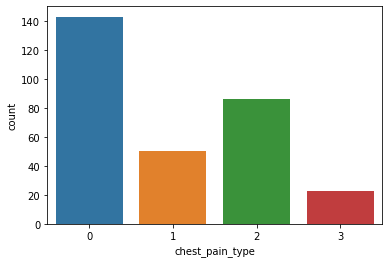

In [87]:
# Count plot to show the types of chest pain

sns.countplot("chest_pain_type",data=data)
plt.show()

In [88]:
data

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels,thalessimia,target
0,63,Male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,Male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,Female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,Male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,Female,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,Male,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,Male,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,Male,0,130,131,0,1,115,1,1.2,1,1,3,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


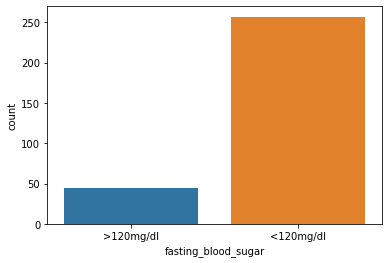

In [89]:
# count plot for Fasting blood sugar

data["fasting_blood_sugar"]= data["fasting_blood_sugar"].replace([1,0],[">120mg/dl","<120mg/dl"])
sns.countplot("fasting_blood_sugar",data=data)
plt.show()

In [90]:
data

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels,thalessimia,target
0,63,Male,3,145,233,>120mg/dl,0,150,0,2.3,0,0,1,1
1,37,Male,2,130,250,<120mg/dl,1,187,0,3.5,0,0,2,1
2,41,Female,1,130,204,<120mg/dl,0,172,0,1.4,2,0,2,1
3,56,Male,1,120,236,<120mg/dl,1,178,0,0.8,2,0,2,1
4,57,Female,0,120,354,<120mg/dl,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,0,140,241,<120mg/dl,1,123,1,0.2,1,0,3,0
299,45,Male,3,110,264,<120mg/dl,1,132,0,1.2,1,0,3,0
300,68,Male,0,144,193,>120mg/dl,1,141,0,3.4,1,2,3,0
301,57,Male,0,130,131,<120mg/dl,1,115,1,1.2,1,1,3,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


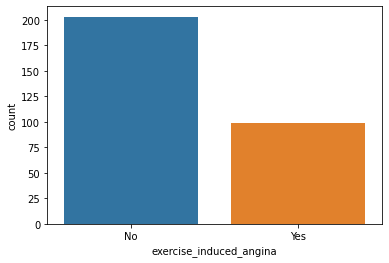

In [91]:
# Count plot to check exercise induced angina

data["exercise_induced_angina"]= data["exercise_induced_angina"].replace([1,0],["Yes","No"])
sns.countplot("exercise_induced_angina",data=data)
plt.show()

In [92]:
data

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels,thalessimia,target
0,63,Male,3,145,233,>120mg/dl,0,150,No,2.3,0,0,1,1
1,37,Male,2,130,250,<120mg/dl,1,187,No,3.5,0,0,2,1
2,41,Female,1,130,204,<120mg/dl,0,172,No,1.4,2,0,2,1
3,56,Male,1,120,236,<120mg/dl,1,178,No,0.8,2,0,2,1
4,57,Female,0,120,354,<120mg/dl,1,163,Yes,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,0,140,241,<120mg/dl,1,123,Yes,0.2,1,0,3,0
299,45,Male,3,110,264,<120mg/dl,1,132,No,1.2,1,0,3,0
300,68,Male,0,144,193,>120mg/dl,1,141,No,3.4,1,2,3,0
301,57,Male,0,130,131,<120mg/dl,1,115,Yes,1.2,1,1,3,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


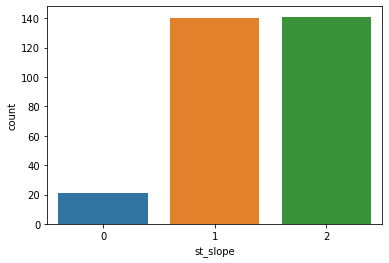

In [93]:
# Countplot for Slope of the peak exercise ST segment
sns.countplot("st_slope",data=data)
plt.show()

occurrence of CVD across the Age category

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


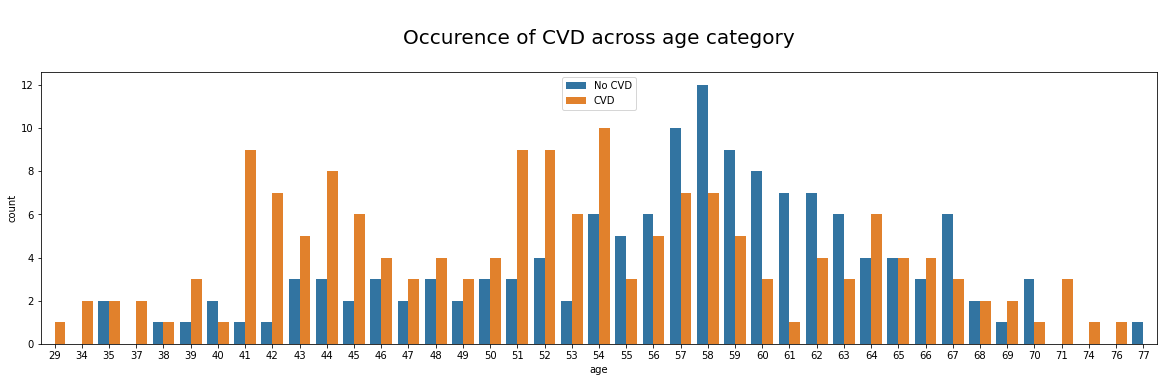

In [94]:
# mapping out occurence of CVD across age category

plt.figure(figsize = (20,5))
sns.countplot(data["age"],hue=data["target"])
plt.legend(['No CVD','CVD'])
plt.title('\nOccurence of CVD across age category\n', fontsize = 20)
plt.show()

composition of all patients with respect to the Sex category

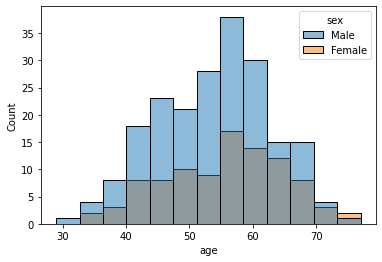

In [95]:
# Composition of patients with relation to sex category

sex=sns.histplot(data=data, x='age', hue='sex')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

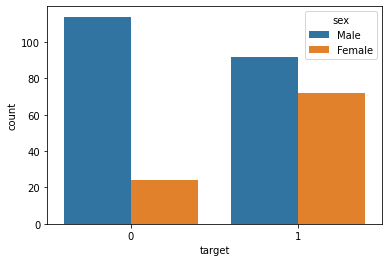

In [96]:
sns.countplot('target',hue='sex',data=data)


Check if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='resting_blood_pressure'>

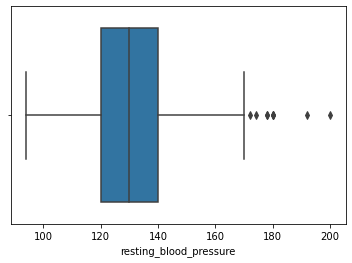

In [97]:
# Boxplot to check for outliers in resting blood pressure
sns.boxplot(data["resting_blood_pressure"])

In [98]:
# Filtering out outliers from resting blood pressure to see it it has effect on CVD
anomaly_trestbps = data["resting_blood_pressure"]>170
data.loc[anomaly_trestbps][['resting_blood_pressure','target']]

,resting_blood_pressure,target
8,172,1
101,178,1
110,180,1
203,180,0
223,200,0
241,174,0
248,192,0
260,178,0
266,180,0


Check the relationship between cholesterol levels and a target variable

<AxesSubplot:xlabel='cholesterol', ylabel='target'>

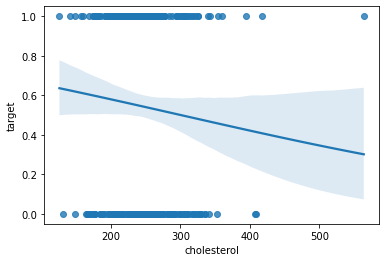

In [99]:
# Regression plot to check for link between cholestrol and CVD

sns.regplot(x="cholesterol",y="target",data=data,logistic=True)

Relationship between peak exercising and the occurrence of a heart attack

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='exercise_induced_angina', ylabel='count'>

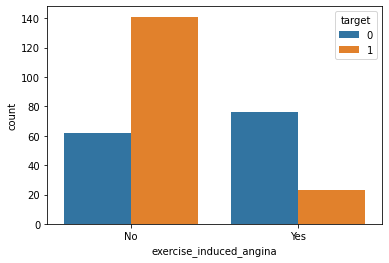

In [100]:
# Relation between exercise induced angina and CVD
sns.countplot('exercise_induced_angina',hue='target',data=data)

Check if thalassemia is a major cause of CVD

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thalessimia', ylabel='count'>

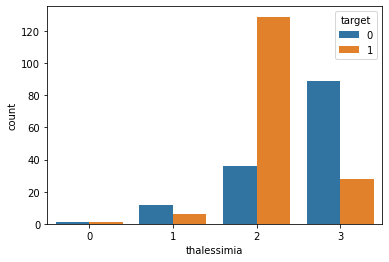

In [101]:
sns.countplot('thalessimia',hue='target',data=data)

In [102]:

data["thalessimia"].value_counts()

2    165
3    117
1     18
0      2
Name: thalessimia, dtype: int64

In [103]:
# Cleaning thalessimia column and replacing 0 with median value 2
data["thalessimia"]= data["thalessimia"].replace(0,2)
data["thalessimia"].value_counts()

2    167
3    117
1     18
Name: thalessimia, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thalessimia', ylabel='count'>

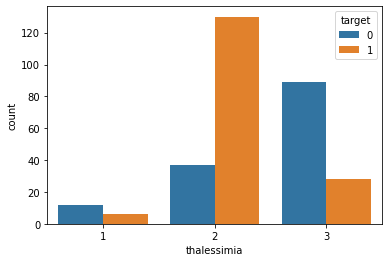

In [104]:
sns.countplot('thalessimia',hue='target',data=data)

how the other factors determine the occurrence of CVD

In [105]:
data["resting_ecg"].value_counts()

1    151
0    147
2      4
Name: resting_ecg, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='resting_ecg', ylabel='count'>

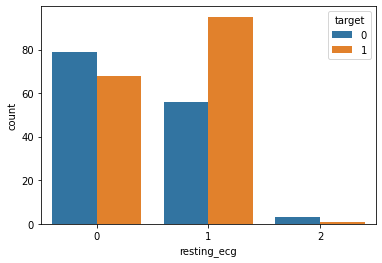

In [106]:
sns.countplot('resting_ecg',hue='target',data=data)

<AxesSubplot:xlabel='max_heart_rate', ylabel='target'>

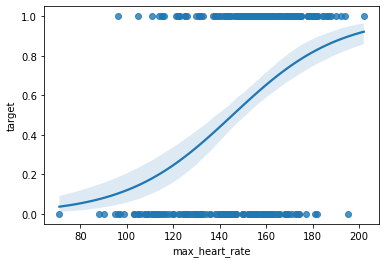

In [107]:
# Regression plot to check for relation between max heart rate and CVD
sns.regplot(x='max_heart_rate',y='target',data=data,logistic=True)

pair plot to understand the relationship between all the given variables

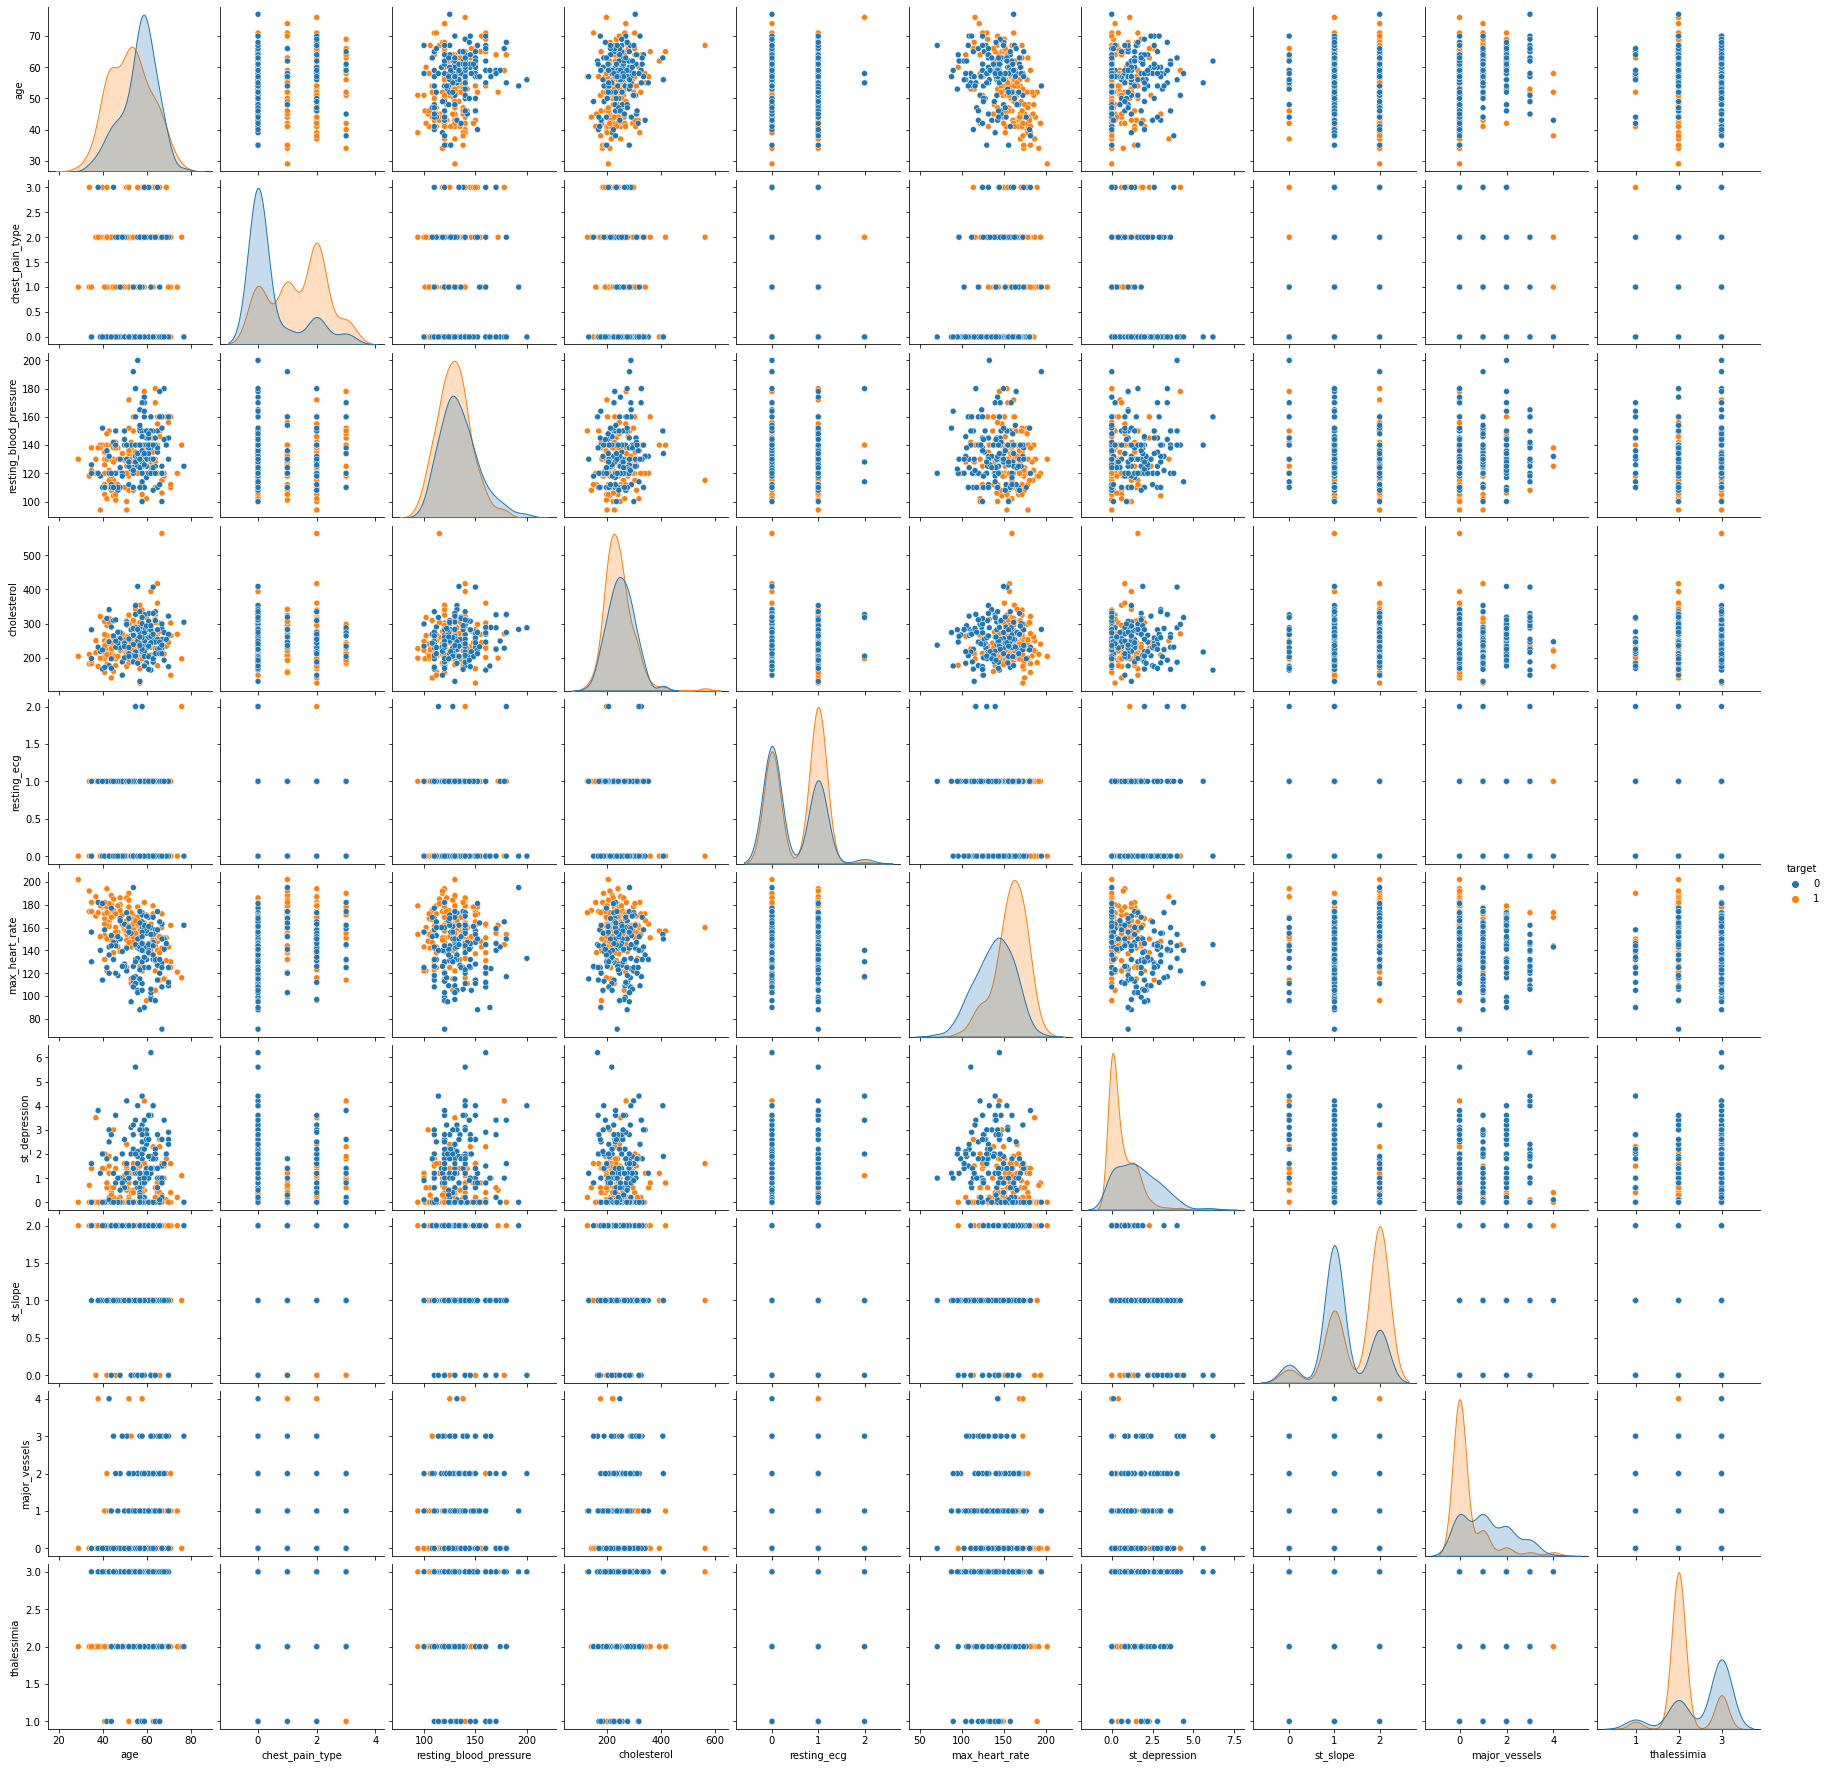

In [108]:
sns.pairplot(data, hue = 'target')

# Logistic Regression Model

In [109]:
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [110]:
data1=data.drop(['sex','chest_pain_type','fasting_blood_sugar','exercise_induced_angina','resting_ecg','st_slope','thalessimia'], axis=1)

In [111]:
data1

,age,resting_blood_pressure,cholesterol,max_heart_rate,st_depression,major_vessels,target
0,63,145,233,150,2.3,0,1
1,37,130,250,187,3.5,0,1
2,41,130,204,172,1.4,0,1
3,56,120,236,178,0.8,0,1
4,57,120,354,163,0.6,0,1
...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0
299,45,110,264,132,1.2,0,0
300,68,144,193,141,3.4,2,0
301,57,130,131,115,1.2,1,0


In [112]:
train, test = split(data1, test_size = .30, random_state = 12)
train.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate,st_depression,major_vessels,target
137,62,128,208,140,0.0,0,1
232,55,160,289,145,0.8,1,0
68,44,120,220,170,0.0,0,1
142,42,120,209,173,0.0,0,1
149,42,130,180,150,0.0,0,1


In [113]:
test.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate,st_depression,major_vessels,target
228,59,170,288,159,0.2,0,0
136,60,120,178,96,0.0,0,1
67,45,130,234,175,0.6,0,1
235,51,140,299,173,1.6,0,0
217,63,130,330,132,1.8,3,0


In [114]:
X_train = train.drop('target', axis = 1)
y_train = train.target

In [115]:
X_train.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate,st_depression,major_vessels
137,62,128,208,140,0.0,0
232,55,160,289,145,0.8,1
68,44,120,220,170,0.0,0
142,42,120,209,173,0.0,0
149,42,130,180,150,0.0,0


In [116]:
y_train.head()

137    1
232    0
68     1
142    1
149    1
Name: target, dtype: int64

In [117]:
X_test = test.drop('target', axis = 1)
y_test = test.target

In [118]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

pred = lr.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [119]:
accuracy_score(y_true = y_test,y_pred = pred)

print(classification_report(y_true=y_test,y_pred = pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        45
           1       0.81      0.83      0.82        46

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [120]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred))

[[36  9]
 [ 8 38]]


In [121]:
Acc0 = (36+38)/(36+8+9+38)
Acc0

0.8131868131868132

In [122]:
data

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels,thalessimia,target
0,63,Male,3,145,233,>120mg/dl,0,150,No,2.3,0,0,1,1
1,37,Male,2,130,250,<120mg/dl,1,187,No,3.5,0,0,2,1
2,41,Female,1,130,204,<120mg/dl,0,172,No,1.4,2,0,2,1
3,56,Male,1,120,236,<120mg/dl,1,178,No,0.8,2,0,2,1
4,57,Female,0,120,354,<120mg/dl,1,163,Yes,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,0,140,241,<120mg/dl,1,123,Yes,0.2,1,0,3,0
299,45,Male,3,110,264,<120mg/dl,1,132,No,1.2,1,0,3,0
300,68,Male,0,144,193,>120mg/dl,1,141,No,3.4,1,2,3,0
301,57,Male,0,130,131,<120mg/dl,1,115,Yes,1.2,1,1,3,0


# Random Forest Classifier 

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
rf=RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)
pred2=rf.predict(X_test)

In [125]:
print(confusion_matrix(y_test, pred2))

[[33 12]
 [10 36]]


In [126]:
Acc1 = (33+36)/(33+12+10+36)
Acc1

0.7582417582417582

In [127]:
accuracy_score(y_true = y_test,y_pred = pred2)

print(classification_report(y_true=y_test,y_pred = pred2))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75        45
           1       0.75      0.78      0.77        46

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91

